In [1]:
import numpy as np
from PIL import Image, ImageDraw
from yolov3_caffe.acl_model import Model
import cv2
import matplotlib.pyplot as plt
from time import time
import os

Control is here


In [2]:
%load_ext autoreload
%autoreload 2

In [107]:
device_id = 0
input_size = 608
model_path = "./config/yolov3_caffe_608_no_csc.om"

In [108]:
%timeit -n 50 -r 5 
model = Model(device_id, model_path, input_size, input_size)

part 1 takes  1.1205673217773438e-05
[ACL] init resource stage:
part set_device takes  4.2438507080078125e-05
part load_from_file takes  0.2945113182067871
part get_desc takes  0.00010466575622558594
part create_data_buffer takes  2.4080276489257812e-05
[Model] create model output dataset:
[Model] create model output dataset success
part _gen_output_dataset takes  0.0010912418365478516
model input size 2
input  0
model input dims ({'name': 'data', 'dimCount': 4, 'dims': [1, 608, 608, 3]}, 0)
model input datatype 4
input  1
model input dims ({'name': 'img_info', 'dimCount': 2, 'dims': [1, 4]}, 0)
model input datatype 0
model output size 2
output  0
model output dims ({'name': 'detection_out3:0', 'dimCount': 2, 'dims': [1, 6144]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'detection_out3:1', 'dimCount': 2, 'dims': [1, 8]}, 0)
model output datatype 3
[Model] class Model init resource stage success


In [116]:
img_dict = {"path": "./data/dog.jpg", "dtype": np.uint8}

In [117]:
img_org_bgr = cv2.imread(img_dict["path"])

In [118]:
%timeit -n 50 -r 10 
boxes = model.run(img_org_bgr)

img_resized shape (608, 608, 3)
123630752
img_buf_size 1108992
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success


In [119]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][1:]

In [120]:
img = Image.open(img_dict["path"])

In [121]:
img1 = ImageDraw.Draw(img)
tmp = []
for i in range(boxes["num_detections"]):
    box = boxes[i]
    img1.rectangle([box["x1"], box["y1"], box["x2"], box["y2"]], outline ="red", width=2)
    print(box["x1"], box["y1"], box["x2"], box["y2"], box["detection_scores"], box["detection_classes"], coco_labels[int(box["detection_classes"])])
    tmp.append([box["x1"], box["y1"], box["x2"], box["y2"], box["detection_scores"], box["detection_classes"], coco_labels[int(box["detection_classes"])]])

103.5 124.3125 587.0 451.75 0.9951171875 1.0 bicycle
478.5 81.0 680.5 169.75 0.9521484375 7.0 truck
135.0 211.5 314.75 547.5 0.9970703125 16.0 dog


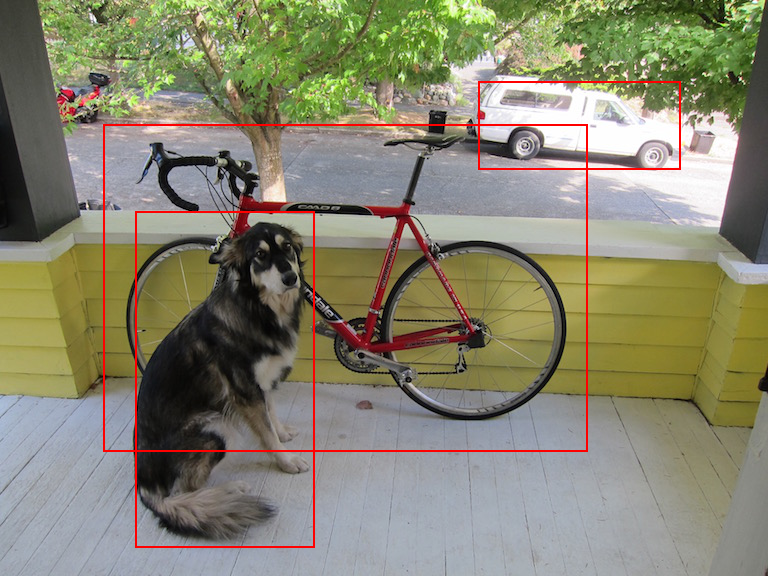

In [122]:
img